<a href="https://colab.research.google.com/github/Piyush94-BA/Loan-Default-Classification/blob/main/Loan_Defaulter_Classification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import fancyimpute
import imblearn

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
pip install 'https://github.com/pandas-profiling/pandas-profiling/archive/master.zip'

In [ ]:
#Loading Data
import pandas as pd
df = pd.read_csv("Train_Data.csv")

In [ ]:
#Checking the data types and null values
print(f"{df.dtypes}\n")
print(f"Null values in each feature:\n{35 * '-'}")
print(f"{df.isnull().sum()}")
df.head()

ID                             int64
Income_of_Applicant            int64
Income_of_Joint_Applicant    float64
Loan_Amount_Requirement      float64
Loan_Amount_Term             float64
Gender                        object
Is_Married                    object
No_of_Dependents              object
IS_Self_Employed              object
Loan_Status                   object
Credit_HistoryOb              object
Level_of_EducationOb         float64
Area_of_PropertyOb           float64
dtype: object

Null values in each feature:
-----------------------------------
ID                            0
Income_of_Applicant           0
Income_of_Joint_Applicant     0
Loan_Amount_Requirement      22
Loan_Amount_Term             14
Gender                       13
Is_Married                    3
No_of_Dependents             15
IS_Self_Employed             32
Loan_Status                   0
Credit_HistoryOb             50
Level_of_EducationOb          0
Area_of_PropertyOb            0
dtype: int64


ID  Income_of_Applicant  ...  Level_of_EducationOb  Area_of_PropertyOb
0   1                 5849  ...                   0.0                 2.0
1   2                 4583  ...                   0.0                 0.0
2   3                 3000  ...                   0.0                 2.0
3   4                 2583  ...                   1.0                 2.0
4   5                 6000  ...                   0.0                 2.0

[5 rows x 13 columns]

In [ ]:
#Changing the data type of a few variables
df['Credit_HistoryOb'] = df['Credit_History'].astype(object)
df['Level_of_EducationOb'] = df['Level_of_Education'].astype(object)
df['Area_of_PropertyOb'] = df['Area_of_Property'].astype(object)
df = df.drop(['Credit_History','Level_of_Education','Area_of_Property'], axis=1)


#Exploratory Data Analysis

##### The package pandas-profiling contains brilliant UI based features that display all the important features of the given data set

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")

In [ ]:
profile

# Missing Data Analysis

##### The categorical data was label encoded, followed by KNN Imputation for both the categorical and continuous data

In [ ]:
#Performing label encoding using OrdinalEncoder function for categorical data
#Using KNN Imputation for imputing both continuous and categorical missing data
#instantiate both packages to use
from sklearn.preprocessing import OrdinalEncoder
from fancyimpute import KNN
encoder = OrdinalEncoder()
imputer = KNN()
# create a list of categorical columns to iterate over
cat_cols = ['Credit_HistoryOb','Gender','Is_Married','No_of_Dependents','IS_Self_Employed','Area_of_PropertyOb','Level_of_EducationOb']

def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode data
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for columns in cat_cols:
    encode(df[columns])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

In [ ]:
# impute categorical data and convert 
encode_data = pd.DataFrame(np.round(imputer.fit_transform(df[['Credit_HistoryOb','Gender','Is_Married','No_of_Dependents','IS_Self_Employed']])))

Imputing row 1/614 with 0 missing, elapsed time: 0.054
Imputing row 101/614 with 0 missing, elapsed time: 0.055
Imputing row 201/614 with 0 missing, elapsed time: 0.056
Imputing row 301/614 with 0 missing, elapsed time: 0.057
Imputing row 401/614 with 0 missing, elapsed time: 0.059
Imputing row 501/614 with 0 missing, elapsed time: 0.060
Imputing row 601/614 with 2 missing, elapsed time: 0.061


In [ ]:
#Renaming columns of categorical variables
encode_data.rename(columns = {0:'Credit_History', 1 : 'Gender', 2 : 'Is_Married', 3 : 'No_of_Dependents', 4 : 'IS_Self_Employed'}, inplace = True)

In [ ]:
encode_data.head()

Credit_History  Gender  Is_Married  No_of_Dependents  IS_Self_Employed
0             1.0     1.0         0.0               0.0               0.0
1             1.0     1.0         1.0               1.0               0.0
2             1.0     1.0         1.0               0.0               1.0
3             1.0     1.0         1.0               0.0               0.0
4             1.0     1.0         0.0               0.0               0.0

In [ ]:
# impute continuous data and convert 
encode_data_cont = pd.DataFrame(np.round(imputer.fit_transform(df[['Loan_Amount_Requirement','Loan_Amount_Term']])))
encode_data_cont.rename(columns = {0:'Loan_Amount_Requirement', 1 : 'Loan_Amount_Term'}, inplace = True)

Imputing row 1/614 with 1 missing, elapsed time: 0.060
Imputing row 101/614 with 0 missing, elapsed time: 0.061
Imputing row 201/614 with 0 missing, elapsed time: 0.062
Imputing row 301/614 with 0 missing, elapsed time: 0.063
Imputing row 401/614 with 0 missing, elapsed time: 0.064
Imputing row 501/614 with 0 missing, elapsed time: 0.065
Imputing row 601/614 with 0 missing, elapsed time: 0.066


In [ ]:
encode_data_cont.head()

Loan_Amount_Requirement  Loan_Amount_Term
0                    118.0             360.0
1                    128.0             360.0
2                     66.0             360.0
3                    120.0             360.0
4                    141.0             360.0

In [ ]:
#Renaming continuous variable columns
#Concatenating imputed data with original data set
df = df.drop(['Credit_HistoryOb','Gender','Is_Married','No_of_Dependents','IS_Self_Employed','Loan_Amount_Requirement','Loan_Amount_Term'], axis=1)
df_imputed = pd.concat([df,encode_data,encode_data_cont],axis = 1)
df_imputed = df_imputed.drop(['ID'], axis=1)
df_imputed.rename(columns = {'Level_of_EducationOb' : 'Level_of_Education', 'Area_of_PropertyOb' : 'Area_of_Property'},inplace = True)

In [ ]:
#Checking for the success of imputation
print(f"{df_imputed.dtypes}\n")
print(f"Null values in each feature:\n{35 * '-'}")
print(f"{df_imputed.isnull().sum()}")
df_imputed.head()

Income_of_Applicant            int64
Income_of_Joint_Applicant    float64
Loan_Status                   object
Level_of_Education           float64
Area_of_Property             float64
Credit_History               float64
Gender                       float64
Is_Married                   float64
No_of_Dependents             float64
IS_Self_Employed             float64
Loan_Amount_Requirement      float64
Loan_Amount_Term             float64
dtype: object

Null values in each feature:
-----------------------------------
Income_of_Applicant          0
Income_of_Joint_Applicant    0
Loan_Status                  0
Level_of_Education           0
Area_of_Property             0
Credit_History               0
Gender                       0
Is_Married                   0
No_of_Dependents             0
IS_Self_Employed             0
Loan_Amount_Requirement      0
Loan_Amount_Term             0
dtype: int64


Income_of_Applicant  ...  Loan_Amount_Term
0                 5849  ...             360.0
1                 4583  ...             360.0
2                 3000  ...             360.0
3                 2583  ...             360.0
4                 6000  ...             360.0

[5 rows x 12 columns]

# Outlier Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


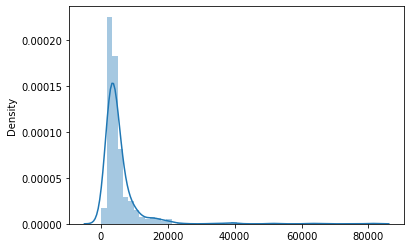

In [ ]:
sns.distplot(x=df_imputed['Income_of_Applicant'])

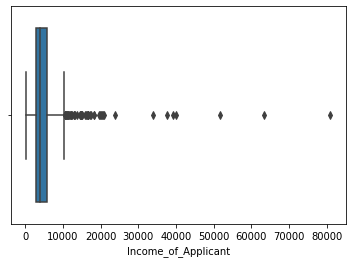

In [ ]:
sns.boxplot(x=df_imputed['Income_of_Applicant'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


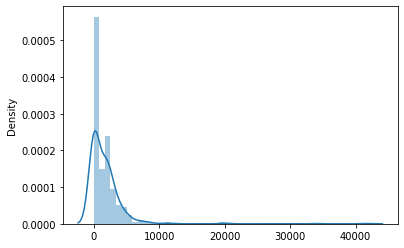

In [ ]:
sns.distplot(x=df_imputed['Income_of_Joint_Applicant'])

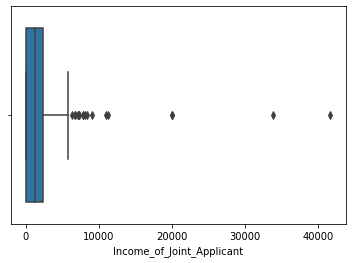

In [ ]:
sns.boxplot(x=df_imputed['Income_of_Joint_Applicant'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


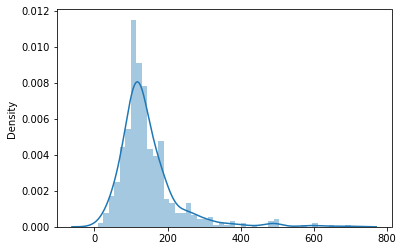

In [ ]:
sns.distplot(x=df_imputed['Loan_Amount_Requirement'])

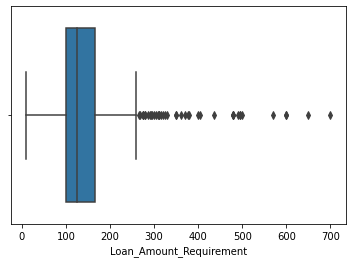

In [ ]:
sns.boxplot(x=df_imputed['Loan_Amount_Requirement'])

##### All the continuous columns are heavily right skewed. Performing Log transformation to normalize the data

In [ ]:
# Skewness and Kurtosis
print("Skewness - Income_of_Applicant : %f" % df_imputed['Income_of_Applicant'].skew())
print("Kurtosis - Income_of_Applicant : %f" % df_imputed['Income_of_Applicant'].kurt())

print("Skewness - Income_of_Joint_Applicant : %f" % df_imputed['Income_of_Joint_Applicant'].skew())
print("Kurtosis - Income_of_Joint_Applicant : %f" % df_imputed['Income_of_Joint_Applicant'].kurt())

print("Skewness - Loan_Amount_Requirement : %f" % df_imputed['Loan_Amount_Requirement'].skew())
print("Kurtosis - Loan_Amount_Requirement : %f" % df_imputed['Loan_Amount_Requirement'].kurt())

Skewness - Income_of_Applicant : 0.479580
Kurtosis - Income_of_Applicant : 3.686875
Skewness - Income_of_Joint_Applicant : 7.491531
Kurtosis - Income_of_Joint_Applicant : 84.956384
Skewness - Loan_Amount_Requirement : -0.172536
Kurtosis - Loan_Amount_Requirement : 2.764756


In [ ]:
df_imputed1 = df_imputed

In [ ]:
#Log Transformation. The value for Income of Joint Applicant is NaN because of the presence of 0.

df_imputed['Income_of_Applicant'] = np.log(df_imputed.Income_of_Applicant)

print("Skewness - Income_of_Applicant : %f" % df_imputed['Income_of_Applicant'].skew())
print("Kurtosis - Income_of_Applicant : %f" % df_imputed['Income_of_Applicant'].kurt())


target_Income_of_Joint_Applicant = np.log(df_imputed.Income_of_Joint_Applicant)

print("Skewness - Income_of_Joint_Applicant : %f" % target_Income_of_Joint_Applicant.skew())
print("Kurtosis - Income_of_Joint_Applicant : %f" % target_Income_of_Joint_Applicant.kurt())

df_imputed['Loan_Amount_Requirement'] = np.log(df_imputed.Loan_Amount_Requirement)

print("Skewness - Loan_Amount_Requirement : %f" % df_imputed['Loan_Amount_Requirement'].skew())
print("Kurtosis - Loan_Amount_Requirement : %f" % df_imputed['Loan_Amount_Requirement'].kurt())

Skewness - Income_of_Applicant : -0.272399
Kurtosis - Income_of_Applicant : 5.686044
Skewness - Income_of_Joint_Applicant : nan
Kurtosis - Income_of_Joint_Applicant : nan
Skewness - Loan_Amount_Requirement : -1.124922
Kurtosis - Loan_Amount_Requirement : 6.687369


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


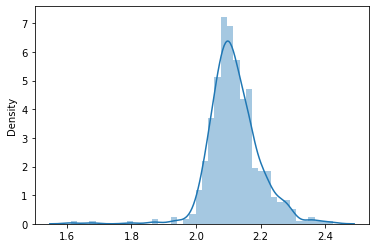

In [ ]:
sns.distplot(x=df_imputed['Income_of_Applicant'])

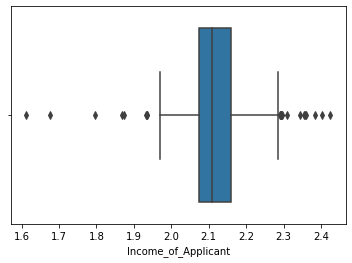

In [ ]:
sns.boxplot(x=df_imputed['Income_of_Applicant'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


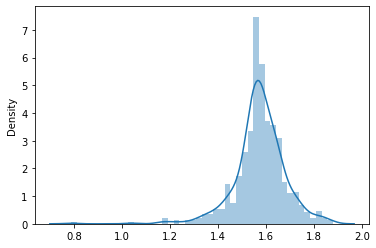

In [ ]:
sns.distplot(x=df_imputed['Loan_Amount_Requirement'])

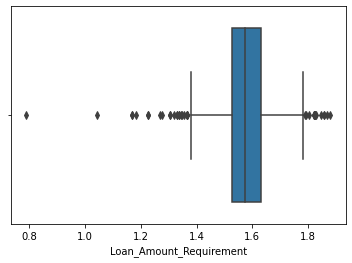

In [ ]:
sns.boxplot(x=df_imputed['Loan_Amount_Requirement'])

##### Since the column Income_of_Joint_Applicant contained zero's, log transformation was not possible. Hence I went with deleting the 18 outliers that were present for this column. Upon doing this, the skewness and Kurtosis were reduced to normal levels

In [ ]:
# identify outliers with standard deviation for Income_of_Joint_Applicant
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)

# calculate interquartile range
q25, q75 = np.percentile(df_imputed['Income_of_Joint_Applicant'], 25), np.percentile(df_imputed['Income_of_Joint_Applicant'], 75)
iqr = q75 - q25

# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

# identify outliers
outliers = [x for x in df_imputed['Income_of_Joint_Applicant'] if x < lower or x > upper]
len(outliers)

18

In [ ]:
# remove outliers
df_imp_out = df_imputed[(df_imputed['Income_of_Joint_Applicant'] < upper)]
df_imp_out.shape

(596, 12)

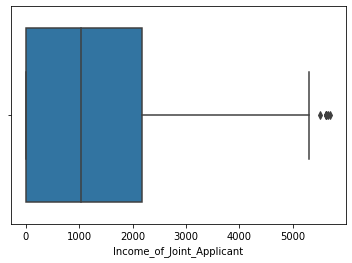

In [ ]:
sns.boxplot(x=df_imp_out['Income_of_Joint_Applicant'])

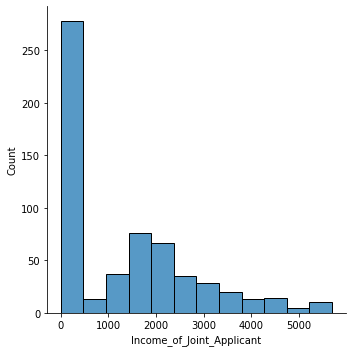

In [ ]:
sns.displot(x=df_imp_out['Income_of_Joint_Applicant'])

In [ ]:
print("Skewness - Income_of_Joint_Applicant : %f" % df_imp_out['Income_of_Joint_Applicant'].skew())
print("Kurtosis - Income_of_Joint_Applicant : %f" % df_imp_out['Income_of_Joint_Applicant'].kurt())


Skewness - Income_of_Joint_Applicant : 0.916837
Kurtosis - Income_of_Joint_Applicant : 0.053060


In [ ]:
df_imp_out.head()

Income_of_Applicant  ...  Loan_Amount_Term
0             2.160333  ...             360.0
1             2.131810  ...             360.0
2             2.080237  ...             360.0
3             2.061368  ...             360.0
4             2.163267  ...             360.0

[5 rows x 12 columns]

##### After the skewness from the data was removed by dealing with the outliers, I scaled the data using the MinMaxScaler to bring the continuous variables to the same scale

In [ ]:
#Performing MinMaxScaler scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(df_imp_out[['Income_of_Applicant','Loan_Amount_Requirement','Income_of_Joint_Applicant']])
df_scaled = pd.DataFrame(data_scaled)

#renaming columns
df_scaled.rename(columns = {0 : 'Income_of_Applicant', 1 : 'Loan_Amount_Requirement',2 : 'Income_of_Joint_Applicant'},inplace = True)

In [ ]:
df_scaled.count()

Income_of_Applicant          596
Loan_Amount_Requirement      596
Income_of_Joint_Applicant    596
dtype: int64

In [ ]:
df_imp_out = df_imp_out.drop(['Income_of_Applicant','Loan_Amount_Requirement','Income_of_Joint_Applicant'], axis=1)
df_imp_out_scaled = pd.concat([df_imp_out,df_scaled],axis = 1)

In [ ]:
df_imp_out_scaled.head()

Loan_Status  ...  Income_of_Joint_Applicant
0           Y  ...                   0.000000
1           N  ...                   0.264515
2           Y  ...                   0.000000
3           Y  ...                   0.413612
4           Y  ...                   0.000000

[5 rows x 12 columns]

In [ ]:
#Checking for the success of imputation
print(f"{df_imp_out_scaled.dtypes}\n")
print(f"Null values in each feature:\n{35 * '-'}")
print(f"{df_imp_out_scaled.isnull().sum()}")
df_imp_out_scaled.head()

Loan_Status                   object
Level_of_Education           float64
Area_of_Property             float64
Credit_History               float64
Gender                       float64
Is_Married                   float64
No_of_Dependents             float64
IS_Self_Employed             float64
Loan_Amount_Term             float64
Income_of_Applicant          float64
Loan_Amount_Requirement      float64
Income_of_Joint_Applicant    float64
dtype: object

Null values in each feature:
-----------------------------------
Loan_Status                  0
Level_of_Education           0
Area_of_Property             0
Credit_History               0
Gender                       0
Is_Married                   0
No_of_Dependents             0
IS_Self_Employed             0
Loan_Amount_Term             0
Income_of_Applicant          0
Loan_Amount_Requirement      0
Income_of_Joint_Applicant    0
dtype: int64


Loan_Status  ...  Income_of_Joint_Applicant
0           Y  ...                   0.000000
1           N  ...                   0.264515
2           Y  ...                   0.000000
3           Y  ...                   0.413612
4           Y  ...                   0.000000

[5 rows x 12 columns]

In [ ]:
#These 17 NaNs are junk values from the removal of the outliers in the earlier steps. dropping them
df_imp_out_scaled = df_imp_out_scaled.dropna()

# Splitting Data into Test & Train before mitigating Imbalance in Dataset

In [ ]:
X = df_imp_out_scaled.iloc[:,1:11]
X.head()

NameError: ignored

In [ ]:
Y = df_imp_out_scaled.iloc[:,0]
Y.head()

NameError: ignored

In [ ]:
#Use inbuilt function to split the data into train and test set
from sklearn.model_selection import train_test_split
# seed the random number generator
seed(100)
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0,test_size=.20,stratify=Y)
print(X_train.shape)
print(X_test.shape)


# Class Imbalance Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


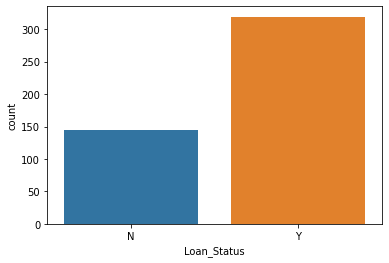

In [ ]:
# visualize the target variable
g = sns.countplot(y_train)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


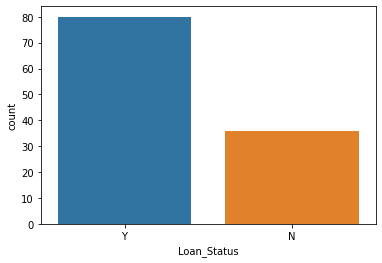

In [ ]:
# visualize the target variable
g = sns.countplot(y_test)
plt.show()

##### Using SMOTE

In [ ]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=5)

print("Before OverSampling, counts of label 'Y': {}".format(sum(y_train == 'Y'))) 
print("Before OverSampling, counts of label 'N': {} \n".format(sum(y_train == 'N'))) 

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(x_smote.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_smote.shape)) 
  
print("After OverSampling, counts of label 'Y': {}".format(sum(y_smote == 'Y'))) 
print("After OverSampling, counts of label 'N': {}".format(sum(y_smote == 'N'))) 

Before OverSampling, counts of label 'Y': 319
Before OverSampling, counts of label 'N': 144 

After OverSampling, the shape of train_X: (638, 10)
After OverSampling, the shape of train_y: (638,) 

After OverSampling, counts of label 'Y': 319
After OverSampling, counts of label 'N': 319


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


##### Using Random over-sampling with imblearn

In [ ]:
# import library
from imblearn.over_sampling import RandomOverSampler

print("Before OverSampling, counts of label 'Y': {}".format(sum(y_train == 'Y'))) 
print("Before OverSampling, counts of label 'N': {} \n".format(sum(y_train == 'N'))) 

ros = RandomOverSampler(random_state=42)

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)


print('After OverSampling, the shape of train_X: {}'.format(X_over.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_over.shape)) 
  
print("After OverSampling, counts of label 'Y': {}".format(sum(y_over == 'Y'))) 
print("After OverSampling, counts of label 'N': {}".format(sum(y_over == 'N'))) 

Before OverSampling, counts of label 'Y': 319
Before OverSampling, counts of label 'N': 144 

After OverSampling, the shape of train_X: (638, 10)
After OverSampling, the shape of train_y: (638,) 

After OverSampling, counts of label 'Y': 319
After OverSampling, counts of label 'N': 319


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# Model Creation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from inspect import signature
from sklearn import metrics

In [ ]:
label_encoder.fit(y_smote)
y_smote = label_encoder.transform(y_smote)
y_test = label_encoder.transform(y_test)

### Logistic Regression

In [ ]:
# define the model
model = LogisticRegression()
# fit on the training set
model.fit(x_smote, y_smote)
# predict on test set
y_pred = model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


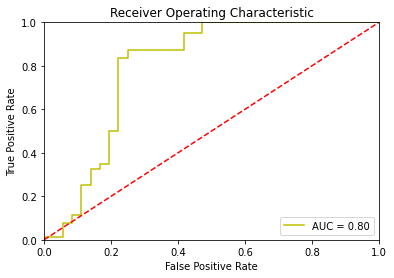

Accuracy: 81.03
Precision Score: 82.95
Recall or Sensitivity Score: 91.25
F1 Score: 86.90
[[21 15]
 [ 7 73]]
Total positive cases= 80
Total negative cases= 36
specificity= 0.5833333333333334
FPR= 0.4166666666666667
FNR= 0.0875
Weighted_TPR_TNR= 0.6854885057471265


In [ ]:
# evaluate predictions
fpr,tpr,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))
ps = precision_score(y_test, y_pred)
print('Precision Score: %.2f' % (ps*100))
sensitivity = recall_score(y_test, y_pred)
print('Recall or Sensitivity Score: %.2f' % (sensitivity*100))
f1 = f1_score(y_test, y_pred)
print('F1 Score: %.2f' % (f1*100))

confusionmatrix=metrics.confusion_matrix(y_test,y_pred)
print(confusionmatrix)
TN=confusionmatrix[0,0]
FP=confusionmatrix[0,1]
FN=confusionmatrix[1,0]
TP=confusionmatrix[1,1]

Total_Positive_Cases=FN+TP
print("Total positive cases=",Total_Positive_Cases)
Total_Negative_Cases=FP+TN
print("Total negative cases=",Total_Negative_Cases)

specificity=TN/Total_Negative_Cases
print("specificity=",specificity)

FPR=FP/Total_Negative_Cases
print("FPR=", FPR)

FNR=FN/Total_Positive_Cases
print("FNR=", FNR)

Weighted_TPR_TNR=(sensitivity*(Total_Negative_Cases/(TP+TN+FP+FN)))+(specificity*(Total_Positive_Cases/(TP+TN+FP+FN)))
print("Weighted_TPR_TNR=", Weighted_TPR_TNR)


### Random Forest

In [ ]:
# define the model
model = RandomForestClassifier()
# fit on the training set
model.fit(x_smote, y_smote)
# predict on test set
y_pred = model.predict(X_test)

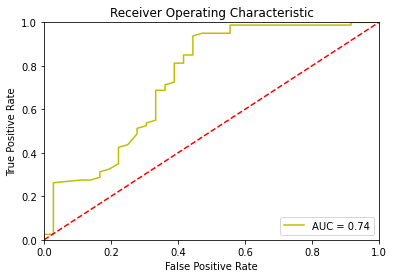

Accuracy: 76.72
Precision Score: 81.93
Recall or Sensitivity Score: 85.00
F1 Score: 83.44
[[21 15]
 [12 68]]
Total positive cases= 80
Total negative cases= 36
specificity= 0.5833333333333334
FPR= 0.4166666666666667
FNR= 0.15
Weighted_TPR_TNR= 0.6660919540229886


In [ ]:
# evaluate predictions
fpr,tpr,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))
ps = precision_score(y_test, y_pred)
print('Precision Score: %.2f' % (ps*100))
sensitivity = recall_score(y_test, y_pred)
print('Recall or Sensitivity Score: %.2f' % (sensitivity*100))
f1 = f1_score(y_test, y_pred)
print('F1 Score: %.2f' % (f1*100))

confusionmatrix=metrics.confusion_matrix(y_test,y_pred)
print(confusionmatrix)
TN=confusionmatrix[0,0]
FP=confusionmatrix[0,1]
FN=confusionmatrix[1,0]
TP=confusionmatrix[1,1]

Total_Positive_Cases=FN+TP
print("Total positive cases=",Total_Positive_Cases)
Total_Negative_Cases=FP+TN
print("Total negative cases=",Total_Negative_Cases)

specificity=TN/Total_Negative_Cases
print("specificity=",specificity)

FPR=FP/Total_Negative_Cases
print("FPR=", FPR)

FNR=FN/Total_Positive_Cases
print("FNR=", FNR)

Weighted_TPR_TNR=(sensitivity*(Total_Negative_Cases/(TP+TN+FP+FN)))+(specificity*(Total_Positive_Cases/(TP+TN+FP+FN)))
print("Weighted_TPR_TNR=", Weighted_TPR_TNR)


### Decision Tree

In [ ]:
# define the model
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# fit on the training set
model.fit(x_smote, y_smote)
# predict on test set
y_pred = model.predict(X_test)

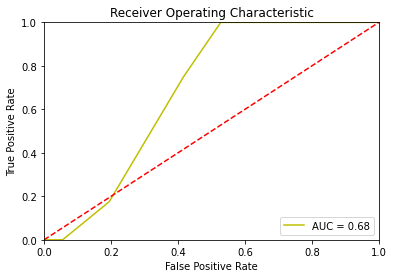

Accuracy: 83.62
Precision Score: 80.81
Recall or Sensitivity Score: 100.00
F1 Score: 89.39
[[17 19]
 [ 0 80]]
Total positive cases= 80
Total negative cases= 36
specificity= 0.4722222222222222
FPR= 0.5277777777777778
FNR= 0.0
Weighted_TPR_TNR= 0.6360153256704981


In [ ]:
# evaluate predictions
fpr,tpr,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))
ps = precision_score(y_test, y_pred)
print('Precision Score: %.2f' % (ps*100))
sensitivity = recall_score(y_test, y_pred)
print('Recall or Sensitivity Score: %.2f' % (sensitivity*100))
f1 = f1_score(y_test, y_pred)
print('F1 Score: %.2f' % (f1*100))

confusionmatrix=metrics.confusion_matrix(y_test,y_pred)
print(confusionmatrix)
TN=confusionmatrix[0,0]
FP=confusionmatrix[0,1]
FN=confusionmatrix[1,0]
TP=confusionmatrix[1,1]

Total_Positive_Cases=FN+TP
print("Total positive cases=",Total_Positive_Cases)
Total_Negative_Cases=FP+TN
print("Total negative cases=",Total_Negative_Cases)

specificity=TN/Total_Negative_Cases
print("specificity=",specificity)

FPR=FP/Total_Negative_Cases
print("FPR=", FPR)

FNR=FN/Total_Positive_Cases
print("FNR=", FNR)

Weighted_TPR_TNR=(sensitivity*(Total_Negative_Cases/(TP+TN+FP+FN)))+(specificity*(Total_Positive_Cases/(TP+TN+FP+FN)))
print("Weighted_TPR_TNR=", Weighted_TPR_TNR)


### Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# define the model
model = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# fit on the training set
model.fit(x_smote, y_smote)
# predict on test set
y_pred = model.predict(X_test)

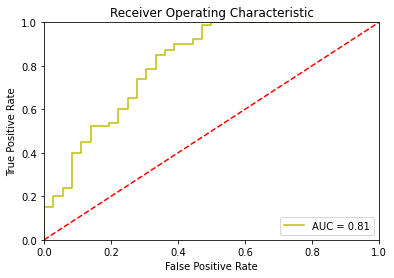

Accuracy: 75.86
Precision Score: 85.14
Recall or Sensitivity Score: 78.75
F1 Score: 81.82
[[25 11]
 [17 63]]
Total positive cases= 80
Total negative cases= 36
specificity= 0.6944444444444444
FPR= 0.3055555555555556
FNR= 0.2125
Weighted_TPR_TNR= 0.723323754789272


In [ ]:
# evaluate predictions
fpr,tpr,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))
ps = precision_score(y_test, y_pred)
print('Precision Score: %.2f' % (ps*100))
sensitivity = recall_score(y_test, y_pred)
print('Recall or Sensitivity Score: %.2f' % (sensitivity*100))
f1 = f1_score(y_test, y_pred)
print('F1 Score: %.2f' % (f1*100))

confusionmatrix=metrics.confusion_matrix(y_test,y_pred)
print(confusionmatrix)
TN=confusionmatrix[0,0]
FP=confusionmatrix[0,1]
FN=confusionmatrix[1,0]
TP=confusionmatrix[1,1]

Total_Positive_Cases=FN+TP
print("Total positive cases=",Total_Positive_Cases)
Total_Negative_Cases=FP+TN
print("Total negative cases=",Total_Negative_Cases)

specificity=TN/Total_Negative_Cases
print("specificity=",specificity)

FPR=FP/Total_Negative_Cases
print("FPR=", FPR)

FNR=FN/Total_Positive_Cases
print("FNR=", FNR)

Weighted_TPR_TNR=(sensitivity*(Total_Negative_Cases/(TP+TN+FP+FN)))+(specificity*(Total_Positive_Cases/(TP+TN+FP+FN)))
print("Weighted_TPR_TNR=", Weighted_TPR_TNR)


### Gradient Tree Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=10, random_state=0)
# fit on the training set
model.fit(x_smote, y_smote)
# predict on test set
y_pred = model.predict(X_test)

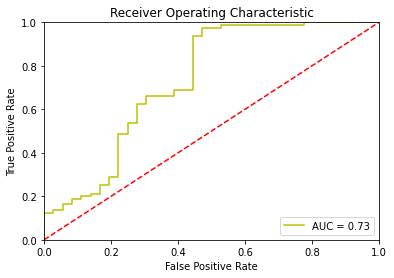

Accuracy: 74.14
Precision Score: 80.49
Recall or Sensitivity Score: 82.50
F1 Score: 81.48
[[20 16]
 [14 66]]
Total positive cases= 80
Total negative cases= 36
specificity= 0.5555555555555556
FPR= 0.4444444444444444
FNR= 0.175
Weighted_TPR_TNR= 0.639176245210728


In [ ]:
# evaluate predictions
fpr,tpr,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))
ps = precision_score(y_test, y_pred)
print('Precision Score: %.2f' % (ps*100))
sensitivity = recall_score(y_test, y_pred)
print('Recall or Sensitivity Score: %.2f' % (sensitivity*100))
f1 = f1_score(y_test, y_pred)
print('F1 Score: %.2f' % (f1*100))

confusionmatrix=metrics.confusion_matrix(y_test,y_pred)
print(confusionmatrix)
TN=confusionmatrix[0,0]
FP=confusionmatrix[0,1]
FN=confusionmatrix[1,0]
TP=confusionmatrix[1,1]

Total_Positive_Cases=FN+TP
print("Total positive cases=",Total_Positive_Cases)
Total_Negative_Cases=FP+TN
print("Total negative cases=",Total_Negative_Cases)

specificity=TN/Total_Negative_Cases
print("specificity=",specificity)

FPR=FP/Total_Negative_Cases
print("FPR=", FPR)

FNR=FN/Total_Positive_Cases
print("FNR=", FNR)

Weighted_TPR_TNR=(sensitivity*(Total_Negative_Cases/(TP+TN+FP+FN)))+(specificity*(Total_Positive_Cases/(TP+TN+FP+FN)))
print("Weighted_TPR_TNR=", Weighted_TPR_TNR)


##### The Adaboost model provides the best performance. The evaluation was done in the following manner:
1. Since this case involves imabalnced data, the value for Specifity should be considerably high in order to understand whether the model is correctly predicting the under-represented negative class as negative. The value for specifity was highest in case Adaboost: 0.6944444444444444

2. The area under the curve was the highest as well for the Adaboost model: 0.81

3. Though the accuracy can be misleading in the case of imbalanced dataset, for thge Addaboost model, it was lower in comparison with the other models (Accuracy: 75.86). But the high values of the Weighted TPR_TNR score, the specifity along with the F Score were indicative of the fact that the model was performing well for the both the positive and negative cases.

4. My second model of choice would be the Logistic Regression Model, where the accuracy, AUC score, F Score are compartively higher than  all the models. However, the model's specifity and Weighted TPR_TNR were less than that of Adaboost.